# Multilayer Perceptron

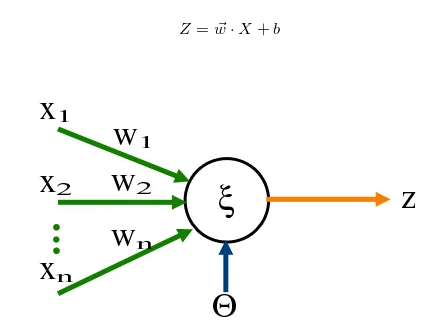

1. Perform affine transformation
     - Preserves collinearity (i.e., all points lying on a line initially still lie on a line after transformation)
     - Preserves ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation).
2. Apply non-linearity function

**Activation Function**

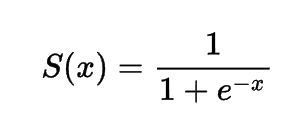

**Example of node (mlp) in a deep neural network**

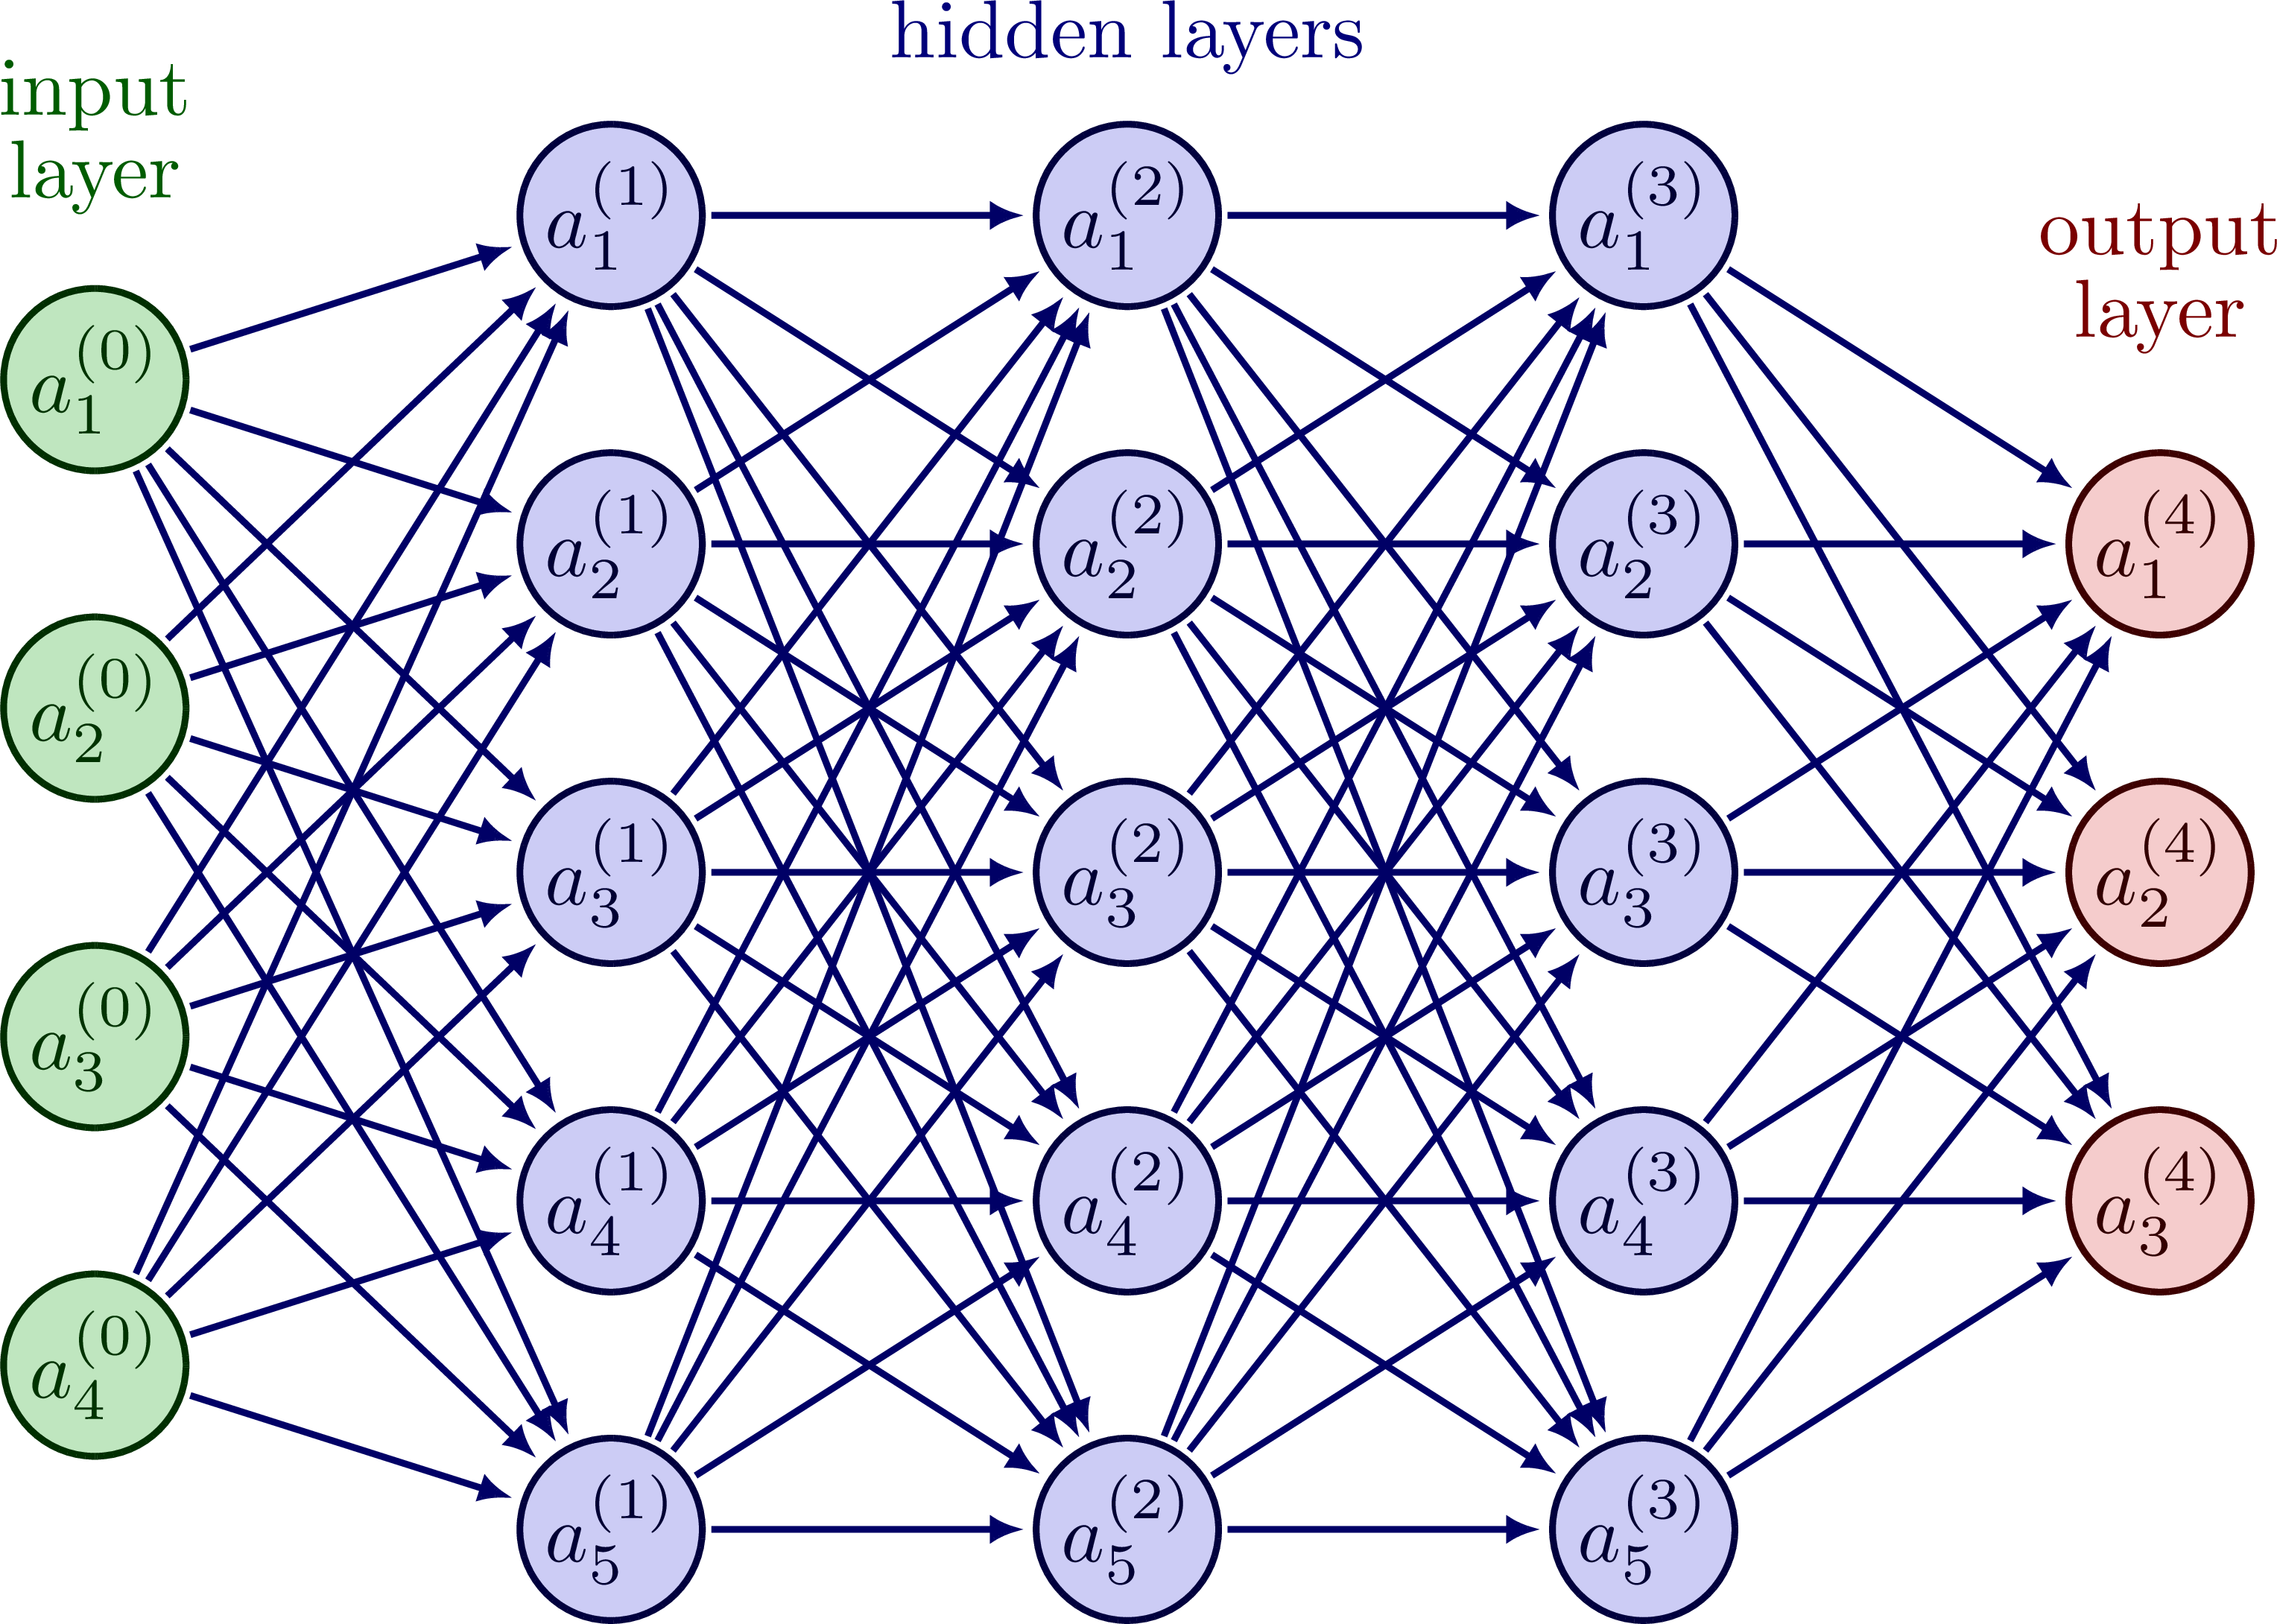

In [2]:
import numpy as np
import numpy.typing as npt
import tensorflow as tf
import matplotlib.pyplot as plt

2023-03-14 15:25:47.659046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 15:25:47.800862: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 15:25:48.398743: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-14 15:25:48.398789: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

**Activation Function Implementation**

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

**Raw Python - MLP**

In [4]:
def linear(x): # sum(b0*x0 + b1*x1 ...) / N_features
    coefficient_b0 = 0.5# weight
    constant = 0.5 # bias
    return coefficient_b0 * x + constant

In [5]:
points = [linear(x) for x in np.linspace(-100, 100)]

In [6]:
points[-1]

50.5

In [7]:
y = mx + b # solve for coefficient m and bias b

mse_ssr 

NameError: name 'mx' is not defined

In [8]:
mlp = [sigmoid(linear(x)) for x in np.linspace(-100, 100)]

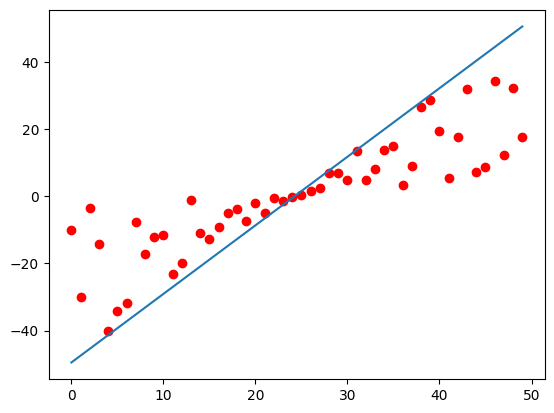

In [13]:
plt.plot(points)
x = np.arange(0, 50)

plt.scatter(x, [p * np.random.uniform() for p in points], c='red')



In [17]:
gt = points
predictions = [p * np.random.uniform() for p in points]

observation_index = 25

print(gt[observation_index])
print(predictions[observation_index])

ssr = lambda y, y_hat: (y - coefficient * x + b) **2

ssr(gt[observation_index], predictions[observation_index])

1.5204081632653086
0.02958886754391305


2.2225421724952374

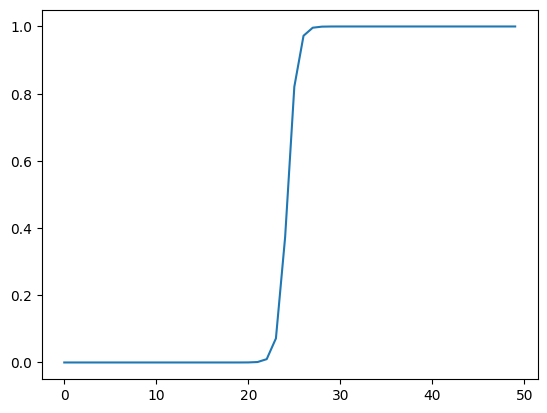

In [194]:
plt.plot(mlp)

**Linear Algebra Implementation - MLP**

In [195]:
def linear_linAlg(x: np.array): # x should take the form [predictor variables]
    coefficient_vector = np.array([0.5]) # weight vector with bias added
    constant = 0.5 # bias
    return np.dot(x, coefficient_vector) + constant

In [196]:
def mlp(x: np.array):
    return sigmoid(linear_linAlg(x))

In [197]:
points = [linear_linAlg(np.array([x])) for x in np.linspace(0, 1)]

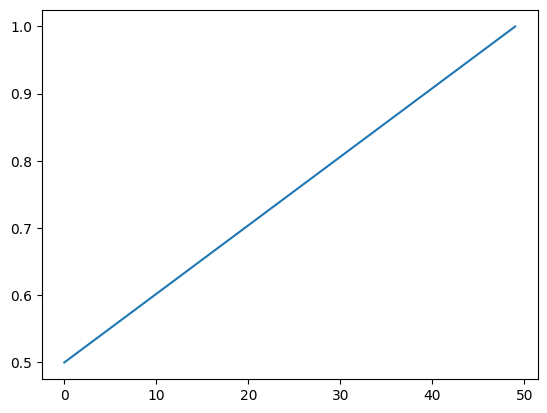

In [198]:
plt.plot(points)

**Tensorflow / Keras Implementation - MLP**

In [213]:
tf.keras.backend.clear_session()

class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer=tf.keras.initializers.Constant(0.5),
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer=tf.keras.initializers.Constant(0.5), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [214]:
linear_layer = Linear(1)

In [215]:
points = [linear_layer(tf.constant([[x]], dtype=tf.float32)) for x in np.linspace(0, 1)]

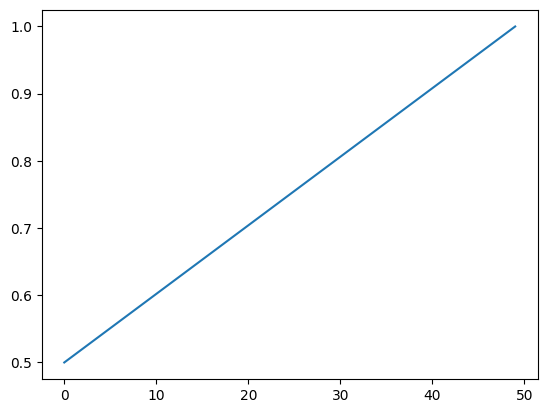

In [216]:
plt.plot([points[i].numpy()[0] for i in range(len(points))])